0.6874806676774586


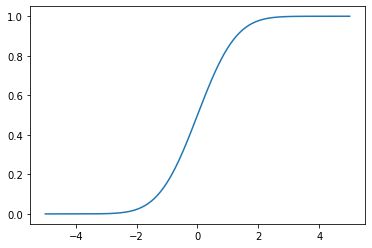

In [93]:
import math
import numpy as np
import seaborn as sns

def phi(x):
    # Cumulative distribution function for the standard normal distribution
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

X = np.linspace(-5,5,400)
Y = [phi(x) for x in X]

def prob_gt(x, mu=0, sigma=1):
    z = (x-mu) / sigma
    for i, _x in enumerate(X):
        if z <= _x:
            return 1-Y[i]
        
def littlewood(fares, demands, sigmas, capacity):
    if len(fares) != 2:
        raise Exception('Must give exactly two fares')
    prot = 0
    for x in np.linspace(0,80,320):
        e2 = fares[0] * prob_gt(x, mu=demands[0], sigma=sigmas[0])
        if fares[1] >= e2:
            return math.ceil(prot)
        prot = x

print(prob_gt(-0.5))
sns.lineplot(x=X,y=Y)

In [96]:
from revpy.revpy import protection_levels

# Problem
fares = np.array([1300, 400])
demands = np.array([21.2, 96.9])
sigmas = np.array([11.2, 20.4])
capacity = 100

# Solutions
p1 = littlewood(fares=fares, demands=demands, sigmas=sigmas, capacity=capacity)
p2 = protection_levels(fares, demands, sigmas, method='EMSRb')

print(f'p1 = {p1}  p2 = {int(p2[1])}')

p1 = 27  p2 = 27
